In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Data

In [2]:
hr=pd.read_csv('D:/Data/Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
hr.shape

(1470, 35)

## Checking for Null Values 

In [5]:
hr.isnull().sum().sum()

0

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Getting to know Data

In this Data there as some data entries are 1,2,3,4. This repersents

1-Low, 2-Medium, 3-High, 4-Very High

For Education  
1-Bellow College, 2-College, 3-Bachelor, 4-Master, 5-Doctor

For Performance  
1-Low, 2-Good, 3-Excellent, 4-Outstanding

For Worklife Balance  
1-Bad, 2-Good, 3-Better, 4-Best

## Attrition

Attrition is a gradual process of wearing down, weakening, or destroying something. When a company wants to reduce its payroll without firing anyone, it will sometimes do so through attrition; that is, by waiting for people to retire or quit without hiring anyone new to replace them.

### Factors affecting Attrition 

#### 1) Retiring

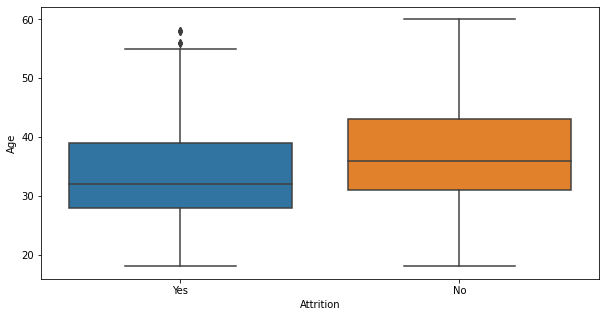

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Attrition', y='Age',data=hr);

As we can see most of Attrition is done in Age range of 28-40, but as shown through Diagram there are some outliers in attrition and thats repersent Senior employes getting retired. Thus, contributing in Attrition

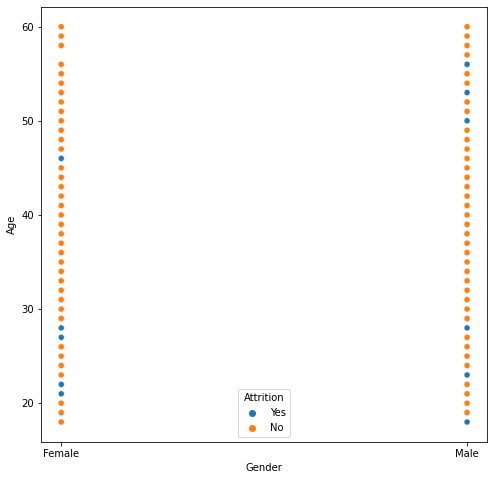

In [8]:
plt.figure(figsize=(8,8))
a=hr[['Gender','Age']]
sns.scatterplot(x='Gender',y='Age',data=hr,hue='Attrition');

In this graph it is catogrised in male and female by there age. 

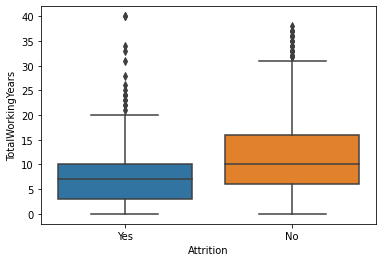

In [9]:
sns.boxplot(x='Attrition',y='TotalWorkingYears',data=hr);

This graph also shows employes who get Retired or Resigned after serving for a long period of time in company.

#### 2) Resign

In [10]:
# np.where(hr['Attrition']=='Yes')
# hr.groupby(np.where(hr['Attrition']=='Yes'))['Department','MonthlyIncome'].plot()
# hr.groupby(['Attrition'])['Department','MonthlyIncome'].plot()

<Figure size 1080x1080 with 0 Axes>

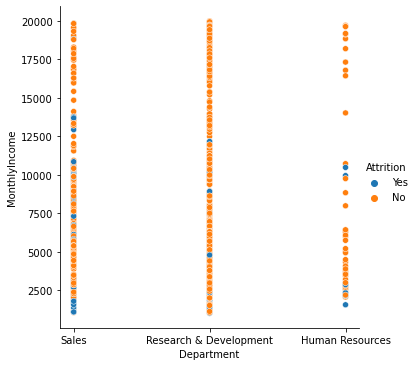

In [11]:
plt.figure(figsize=(15,15))
sns.relplot(x='Department',y='MonthlyIncome',data=hr,hue='Attrition');

This graph shows employes of diffrent department resigning due to lesser Monthly Income.
As we can see there are so many employes under 12500 rupess monthly income are resigning. 

<Figure size 1080x1080 with 0 Axes>

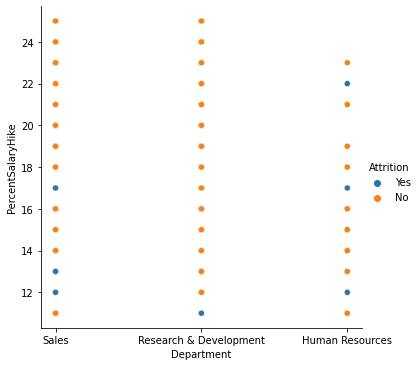

In [12]:
plt.figure(figsize=(15,15))
sns.relplot(x='Department',y='PercentSalaryHike',data=hr,hue='Attrition');

As due to lesser salary employees are resigning. Same goes to employes not getting enough salary hike.
As shown employes with less than 18% of salary hike are resigning.

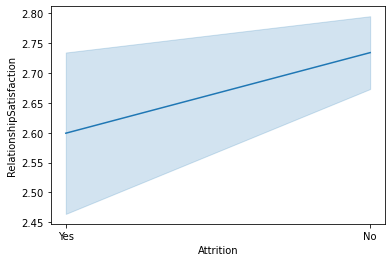

In [13]:
sns.lineplot(x='Attrition',y='RelationshipSatisfaction',data=hr);

Relationship with Co-workers or Manager etc. matters alot for a employe to stay and as shown in graph employes wiht lesser RelationShip Satisfaction are tends to resign.

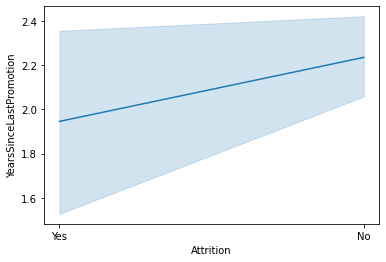

In [14]:
sns.lineplot(x='Attrition',y='YearsSinceLastPromotion',data=hr);

Motivation for working is a major factor and one of way to increase motivation promotion is a main factor and we can see employes with more years as same role tends to resign as compare to with employes getting Promotion frequently.

#### Observation

As with employes with (1.6-2.4) years without promotion are likly to resign and employes with lesser (2.0-2.4) years are tend to stay.

#### 3) Inconvinence

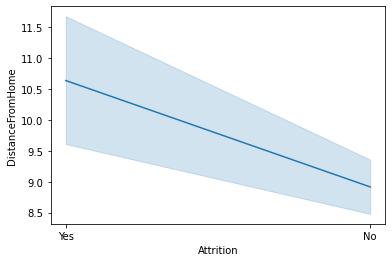

In [15]:
sns.lineplot(x='Attrition',y='DistanceFromHome',data=hr);

Employes with more distance between their office and home goes for another job near their home and contribute in factor for Attrition.

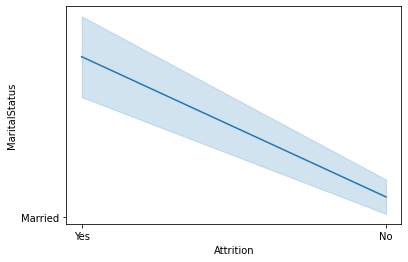

In [16]:
sns.lineplot(x='Attrition',y='MaritalStatus',data=hr);

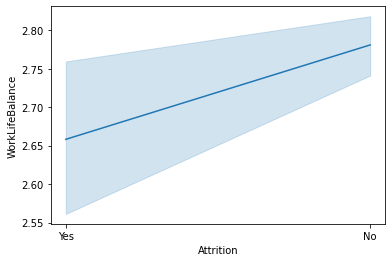

In [23]:
sns.lineplot(x='Attrition',y='WorkLifeBalance',data=hr);

Work life balance is important for steady job. As shown employes with lesser worklife balance tends to resign.

#### 4) Responsibility 

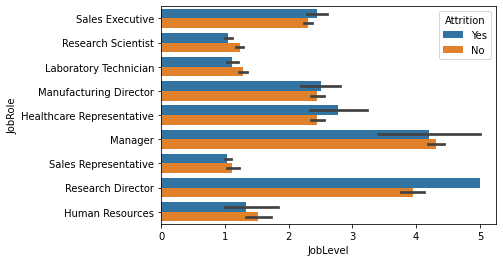

In [18]:
sns.barplot(x='JobLevel',y='JobRole',data=hr,hue='Attrition');

As we can see in graph Attrition factor is high on important roles in company.

In executive level position like Sales Executive, Manufacture Director, Healthcare Repesentative and Research Director responsibilty is high and Attrition level is also high.

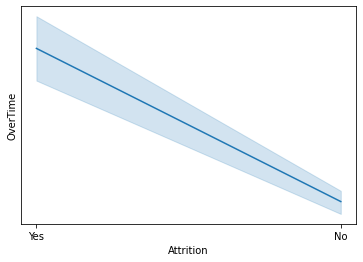

In [19]:
sns.lineplot(x='Attrition',y='OverTime',data=hr);

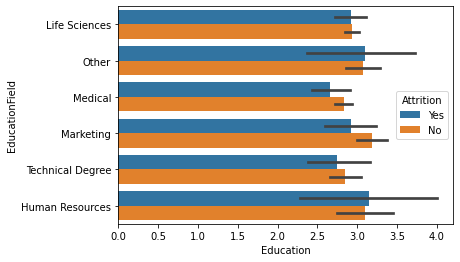

In [20]:
sns.barplot(x='Education',y='EducationField',data=hr,hue='Attrition');

Attrition level in important Education feild is low like in Life Science, Medical, Marketing, Technical Degree as compare to other education feild. 